<a href="https://colab.research.google.com/github/Pradeep2535/AICTE-final/blob/main/Deep_Learning_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

#Exp -1

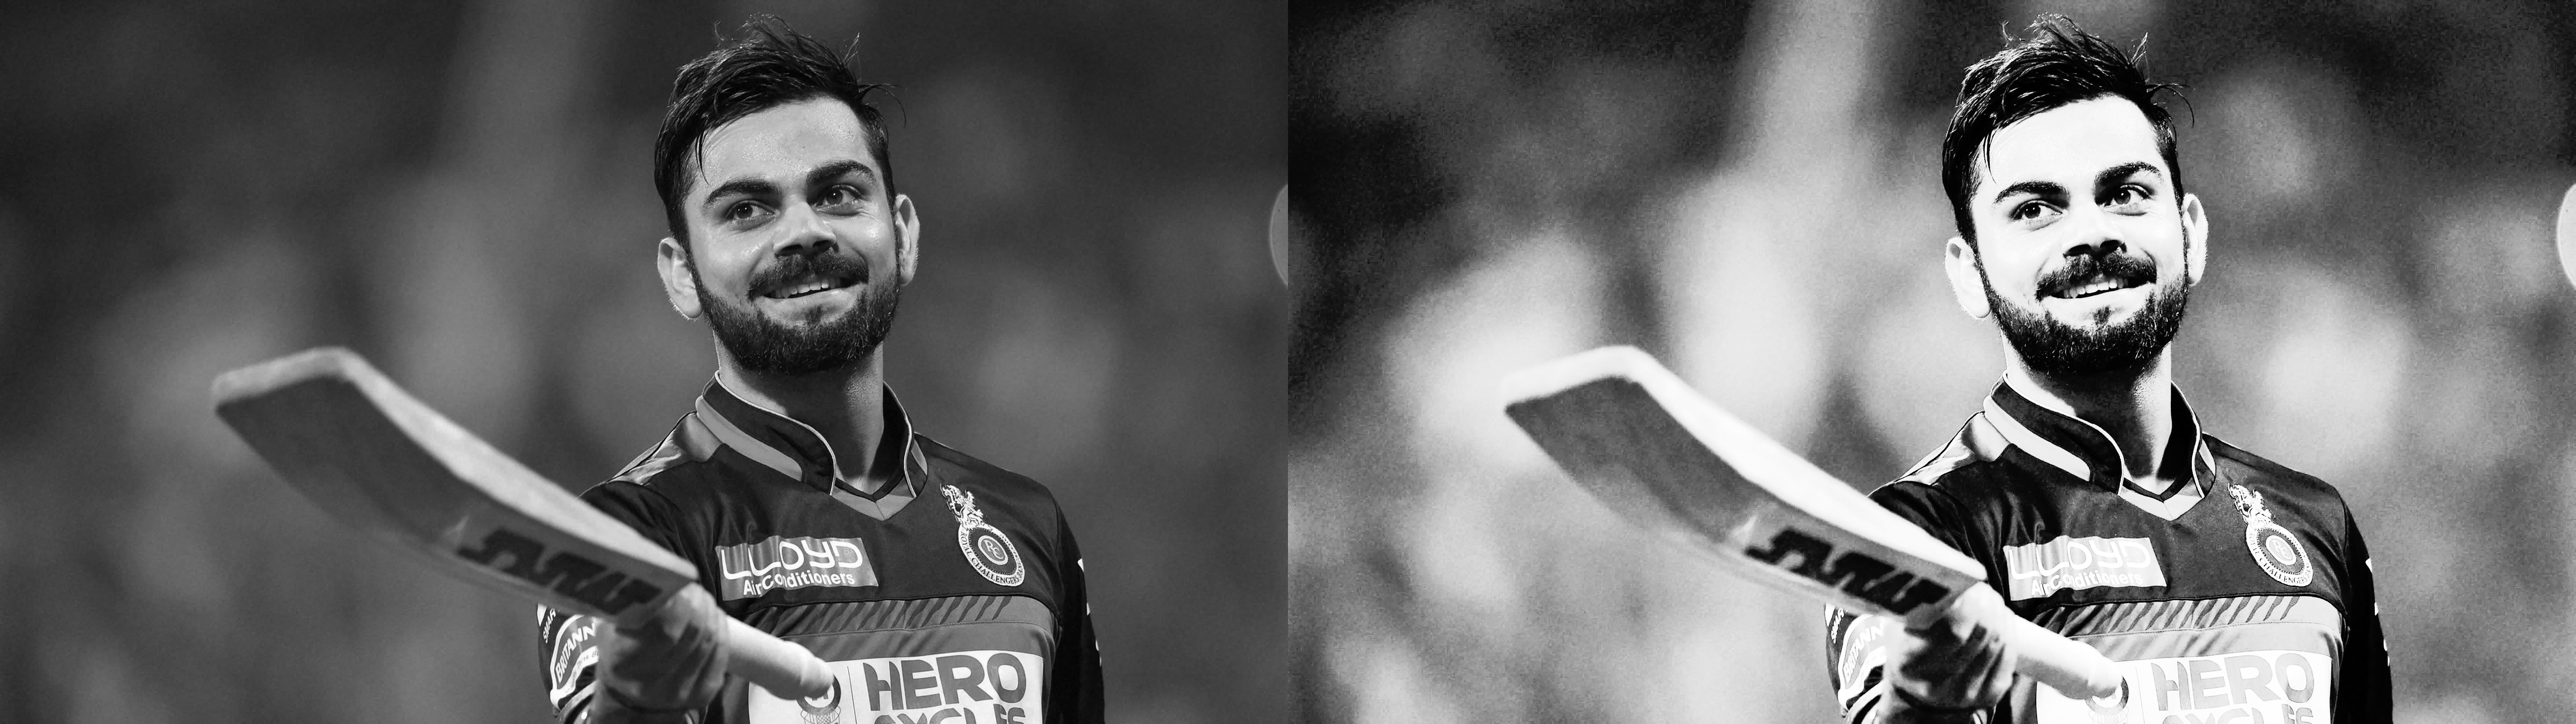

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/wp7489540.webp',0)
hist = cv2.equalizeHist(img)

res = np.hstack((img,hist))
cv2_imshow(res)


#Exp -2

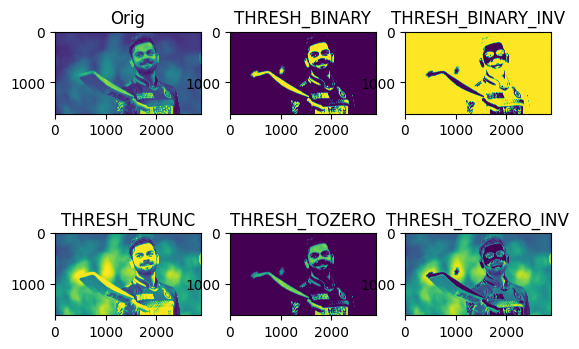

In [18]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/wp7489540.webp',0)
ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Orig', 'THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i])
  plt.title(titles[i])

#Exp-3

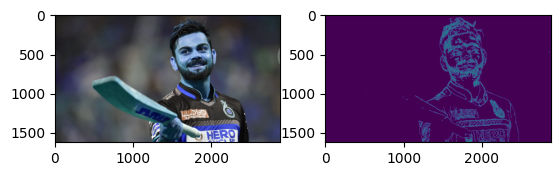

In [21]:
import cv2

img = cv2.imread('/content/wp7489540.webp')
edge = cv2.Canny(img,50,150)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(edge)

#Exp-4

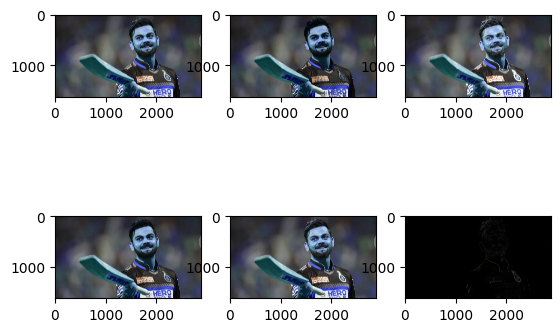

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/wp7489540.webp')
kernel=np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)
dilation = cv2.dilate(img,kernel,iterations=1)
open=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
to_phat=cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)

images = [img,erosion,dilation,open,close,to_phat]

for i in range(len(images)):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i])


#Exp-8

In [24]:
!pip install tensorflow

In [31]:
!unzip '/content/drive/MyDrive/cats_and_dogs_filtered.zip' -d '/content/dataset'

Archive:  /content/drive/MyDrive/cats_and_dogs_filtered.zip
   creating: /content/dataset/cats_and_dogs_filtered/
  inflating: /content/dataset/cats_and_dogs_filtered/vectorize.py  
   creating: /content/dataset/cats_and_dogs_filtered/validation/
   creating: /content/dataset/cats_and_dogs_filtered/train/
   creating: /content/dataset/cats_and_dogs_filtered/validation/dogs/
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /content/dataset/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /content/dataset/cats_

#Dataset - https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


In [8]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
train_ds = ImageDataGenerator().flow_from_directory(
    '/content/dataset/cats_and_dogs_filtered/train',target_size=(128,128)
)

Found 2000 images belonging to 2 classes.


In [4]:
model.fit(train_ds,epochs=2) #increase epochs for better accuracy

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 382ms/step - accuracy: 0.5021 - loss: 395.3454
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 386ms/step - accuracy: 0.7289 - loss: 2.0238


In [15]:
test_image = '/content/dataset/cats_and_dogs_filtered/validation/cats/cat.2000.jpg'
img = load_img(test_image,target_size=(128,128))
img_arr = img_to_array(img)
img_arr=img_arr/255.0
image = np.expand_dims(img_arr,axis=0)
pred = model.predict(image)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.5546785 , 0.44532147]], dtype=float32)

In [35]:
if pred[0][0]<=0.5:
  result = "Dog"
else:
  result = "Cat"
print(result)

Cat


(-0.5, 458.5, 498.5, -0.5)

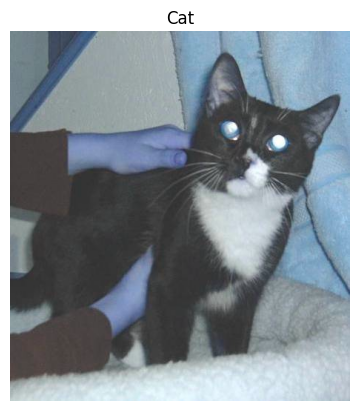

In [36]:
import matplotlib.pyplot as plt
import cv2
img_cv = cv2.imread('/content/dataset/cats_and_dogs_filtered/validation/cats/cat.2000.jpg')
plt.imshow(img_cv)
plt.title(result)
plt.axis('off')

#Exp-9
#Dataset - https://drive.google.com/file/d/1wLtyia6mJ30EDmto82_itL63YfTp7LNo/view?usp=drive_link

In [22]:
!unzip '/content/drive/MyDrive/horse_human.zip' -d '/content/dataset'

Archive:  /content/drive/MyDrive/horse_human.zip
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-0.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-1.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-2.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-3.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-4.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-5.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-6.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-7.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-8.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse01-9.png  
  inflating: /content/horse-or-human/horse-or-human/train/horses/horse02-0.png  
  inflating: /content/horse-or-human/horse-or-human/train/ho

In [25]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [23]:
train_ds = ImageDataGenerator().flow_from_directory(
    '/content/horse-or-human/train',
    target_size=(128,128)
)

Found 1027 images belonging to 2 classes.


In [26]:
model.fit(train_ds, epochs=2) #increase epochs for better acc.

Epoch 1/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 463ms/step - accuracy: 0.5838 - loss: 898.2173
Epoch 2/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 461ms/step - accuracy: 0.9503 - loss: 5.4240


In [27]:
test_image = '/content/horse-or-human/train/horses/horse01-0.png'
img = load_img(test_image, target_size=(128,128))
img_arr = img_to_array(img)

image = np.expand_dims(img_arr,axis=0)
pred = model.predict(image)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[1., 0.]], dtype=float32)

In [32]:
if pred[0][0]<=0.5:
  result = "Human"
else:
  result = "Horse"
print(result)

Horse


(-0.5, 299.5, 299.5, -0.5)

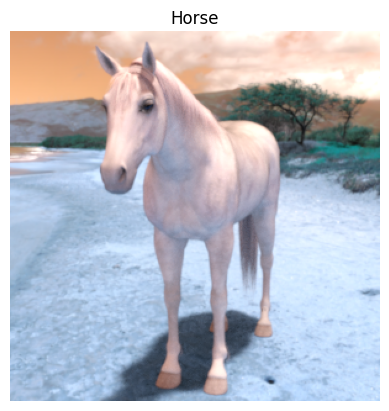

In [34]:
import matplotlib.pyplot as plt
import cv2
img_cv = cv2.imread('/content/horse-or-human/train/horses/horse01-0.png')
plt.imshow(img_cv)
plt.title(result)
plt.axis('off')


#Exp-10

In [46]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris_ds = datasets.load_iris()


In [47]:
X = iris_ds.data[:,:2]
y = (iris_ds.target==0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [59]:
model = Sequential()
model.add(Dense(32,input_shape=(2,)))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6923 - loss: 0.5680  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 0.5841 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6350 - loss: 0.5966 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6590 - loss: 0.5781 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.5717 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6600 - loss: 0.5585 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6600 - loss: 0.5518 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6475 - loss: 0.5537 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6360 - loss: 0.5493 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6058 - loss: 0.5603 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.5222 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6329 - loss: 0.5239 


In [61]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f"Loss : {loss} Accuracy : {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 0.3040
Loss : 0.30404141545295715 Accuracy : 1.0


In [62]:
pred = model.predict(X_test)
pred = (pred>0.5).astype(int)
for i in range(len(pred)):
  print(f"Predicted : {pred[i]} Actual : {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted : [0] Actual : 0
Predicted : [1] Actual : 1
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [1] Actual : 1
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [1] Actual : 1
Predicted : [1] Actual : 1
Predicted : [1] Actual : 1
Predicted : [0] Actual : 0
Predicted : [1] Actual : 1
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [1] Actual : 1
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [1] Actual : 1
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0
Predicted : [0] Actual : 0


#Exp-11

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np


In [4]:
(train_X,train_y),(test_X,test_y) = fashion_mnist.load_data()

labels = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag', 'Ankle Boots']
train_X = train_X.reshape(-1,28,28,1)/255.0
test_X = test_X.reshape(-1,28,28,1)/255.0

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.utils import to_categorical

train_y_one_hot = to_categorical(train_y,num_classes=10)
test_y_one_hot = to_categorical(test_y,num_classes=10)

In [9]:
model.fit(train_X.astype(np.float32),train_y_one_hot.astype(np.float32),epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8902 - loss: 0.3162
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9022 - loss: 0.2775


In [29]:
pred = model.predict(test_X[3:4])
pred_label = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, 'Predicted : Trouser Actual : Trouser')

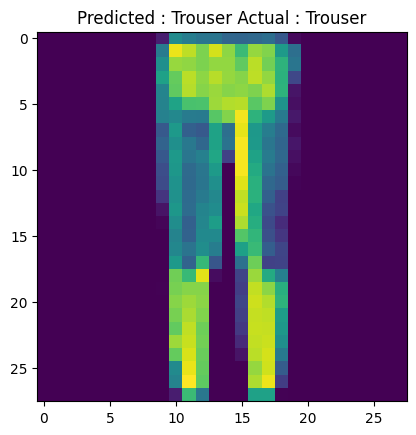

In [31]:
import matplotlib.pyplot as plt

plt.imshow(test_X[3:4][0])
plt.title(f"Predicted : {labels[pred_label]} Actual : {labels[np.argmax(test_y_one_hot[3:4])]}")